In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; max-height: unset; }</style>"))

In [2]:
file_path = 'Datasets/full_dataset.csv'
df = pd.read_csv(file_path)
df.shape

(3317242, 12)

In [3]:
df1 = df[~df['site'].isin(['regio7', 'diaridegirona', 'levante-emv', 'mallorcazeitung', 'farodevigo', 'laopinioncoruna'])]
keep_category = ["vida y estilo", "consumo", "activos", "decoracion", "actualidad", "futbol",
                  "internacional", "cultura", "nacional", "politica", "sociedad" , "economia", "cine", 
                  "ocio", "baloncesto", "gastronomia", "deportes", "ciencia", "motor", "tecnologia",
                  "salud", "esquelas", "belleza", "famosos", "television", "ocio y cultura"]
df1 = df1[df1['url_subsection'].isin(keep_category)]
df1 = df1[~df1['url'].str.contains('val.|amp')]
df1['length']= df1['body'].apply(lambda x: len(str(x).split()))
df1 = df1[(df1['length'] <=800) & (df1['length'] >=80)]
df1 = df1.drop_duplicates(subset=['body'])
df1.shape

(189627, 13)

In [5]:
df2 = df1[['body', 'url_subsection']].copy()
df2.rename(columns={'body': 'text', 'url_subsection': 'label'}, inplace=True)
df2 = df2.groupby('label').apply(lambda x: x.sample(n=1000, replace=True, random_state=1) if len(x) >= 1000 else x).reset_index(drop=True)
df2.shape

(26000, 2)

In [6]:
new_file = 'Datasets/train_dataset.csv'
df2.to_csv(new_file, index=False)

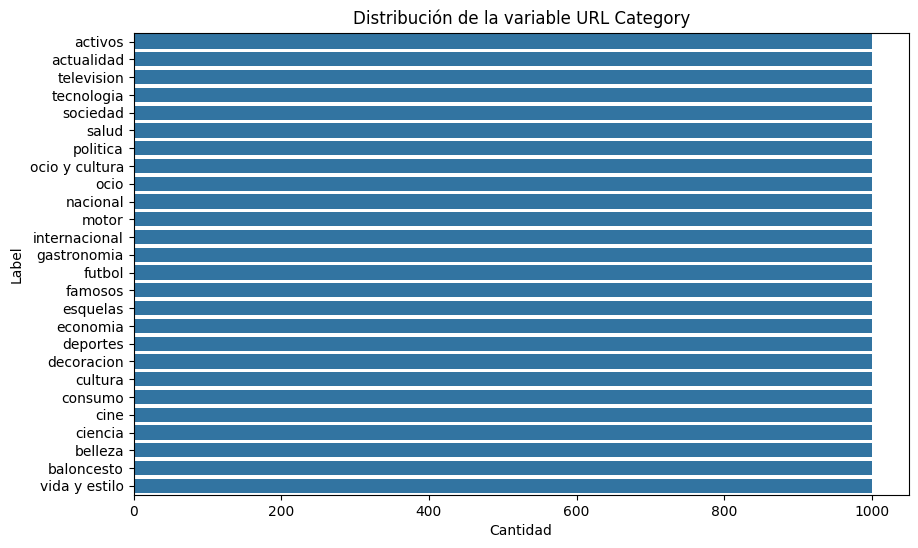

26

In [7]:
unique_url_category = df2['label'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df2, order = df2['label'].value_counts().index)
plt.title('Distribución de la variable URL Category')
plt.xlabel('Cantidad')
plt.ylabel('Label')
plt.show()

unique_url_category